In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# initialization function: plot the background of each frame
def animate_trajectory(filename, lim=20):
    fig, ax = plt.subplots()


    line, = ax.plot([], [],  lw=2, color='red')
    line2, = ax.plot([], [], lw=2, color='blue')
    x0, y0, x1, y1 = [], [], [], []

    df = pd.read_csv(filename)
    x_0 = df['x0'].to_numpy().tolist()
    y_0 = df['y0'].to_numpy().tolist()
    x_1 = df['x1'].to_numpy().tolist()
    y_1 = df['y1'].to_numpy().tolist()
    x0, y0, x1, y1 = [], [], [], []
    
    max_l = max(x_0)
    
    if max_l < max(y_0):
        max_l = max(y_0)
    if max_l < max(x_1):
        max_l = max(x_1)
    if max_l < max(y_1):
        max_l = max(y_1)
    
    
    #ax.set_xlim((min(min(x_0), min(x_1)), max(max(x_0),max(x_1))))
    #ax.set_ylim((min(min(y_0), min(y_1)), max(max(y_0),max(y_1))))
    ax.set_xlim(-max_l,max_l)
    ax.set_ylim(-max_l,max_l)
    # First set up the figure, the axis, and the plot element we want to animate

    def init():
        line.set_data([], [])
        return (line,)

    # animation function. This is called sequentially
    def animate(i):
        x0.append((x_0[i]))
        y0.append((y_0[i]))
        x1.append((x_1[i]))
        y1.append((y_1[i]))
        line.set_data(x0, y0)
        line2.set_data(x1,y1)
        return (line, line2, )

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=len(df), interval=40, blit=True)

    return anim

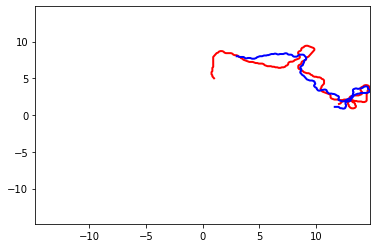

In [4]:
anim_p = animate_trajectory("trajectories/pursuer_trajectory3999.csv", 10)
HTML(anim_p.to_html5_video())

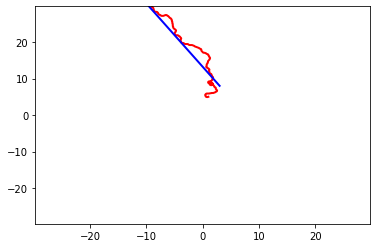

In [6]:
anim_p = animate_trajectory("trajectories/pursuer_trajectory9900.csv", 40)
HTML(anim_p.to_html5_video())

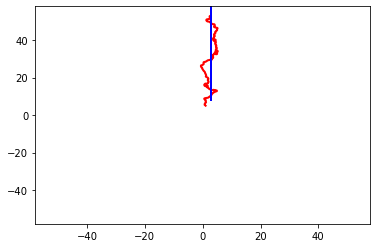

In [7]:
anim_p = animate_trajectory("trajectories/pursuer_trajectory13999.csv", 40)
HTML(anim_p.to_html5_video())